In [1]:
#Bring in packages for coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

%matplotlib inline 

In [5]:
#Read in the SIPRI data, specifcying the sheetname and the columns for the years 1995-2005.
militaryData = pd.read_excel("SIPRI-Milex-data-1988-2015.xlsx", 
                             sheetname= "Constant (2014) USD", #Specify the sheet of 'Constant USD' so we can look 
                             #at inflation adjusted data'''
                            header = 5,
                            parse_cols = [0,9,10,11,12,13,14,15,16,17,18,19],
                            skip_footer = 1)

# Check to see that the sheet was read in correctly
militaryData.head()

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1394.26,1587.51,1909.39,2019.43,2131.25,2473.02,2706.75,2765.99,2706.39,3078.36,3222.68
3,Libya,. .,. .,613.098,691.575,533.993,571.53,559.134,718.595,894.409,1167.95,1150.53
4,Morocco,2003.81,1998.46,2093.03,2117.98,1794.52,1358.01,2457,2337.67,2476.16,2406.68,2497.55


In [3]:
#Remove the footer rows and confirm that everything there is gone 
militaryData = militaryData.drop(militaryData.index[-7:], axis = 0)
militaryData.tail()

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
186,Turkey,15381.9,17221.3,17942,18800.2,20758.2,20089.3,18416.3,19594.9,17685.3,16139.8,15279.1
187,UAE,. .,. .,6285.16,7411.27,7661.99,10494,10072.9,9038.05,9551.4,10623.7,9691.74
188,Yemen,1134.63,1032.92,1324.85,1272.37,1379.42,1641.42,1744.35,2209.24,2279.62,1859.16,1911.13
189,"Yemen, North",xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx
190,"Yemen, South",xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx


In [47]:
#G20 Countries Argentina, Australia, Brazil, Canada, China, France, Germany, India, Indonesia, Italy, Japan, Mexico, 
#Russia, Saudi Arabia, South Africa, South Korea, Turkey, the United Kingdom, the United States of America

#Use pandas index methods with 'isin' method on 'Country' column to select G20 nations 
militaryDataG20 = militaryData.loc[militaryData["Country"].isin(["Argentina", "Australia", "Brazil", 
                                                        "Canada", "China, P.R.", "France",
                                                       "Germany", "India", "Indonesia",
                                                       "Italy", "Japan", "Mexico", "USSR/Russia",
                                                       "Saudi Arabia", "South Africa", "Korea, South",
                                                       "Turkey", "UK", "USA"])]

#Quickly Change USSR to Russia
militaryDataG20 = militaryDataG20.set_value(150,"Country", "Russia")

#Call head to make sure everything came out as expected
militaryDataG20.head(20)

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
45,South Africa,3379.52,2937.39,2700.28,2392.62,2292.79,2691.02,3008.89,3306.96,3267.78,3313.5,3631.09
65,Mexico,3643.38,3867.46,3875.18,3996.55,4204.92,4340.16,4295.07,4154.12,4140.86,3989.31,4287.48
70,Canada,16277.9,14948.1,13775,14251.3,14866.4,14622.9,15010.6,15086.8,15364.5,15946.1,16647.4
71,USA,433220,409656,407537,398332,399314,414768,418135,469486,534351,582400,610176
73,Argentina,1890.4,1677.41,1649.35,1662.71,1713.53,1632.24,1607.89,1370.18,1411.29,1452.27,1525.52
75,Brazil,19334.2,17979.9,17856.7,19193.5,19662.2,21298.1,24669.8,24999.1,19943,20721.4,22420.8
92,"China, P.R.",26213.4,27837,29857.6,32715.3,39800.3,43229.8,52179.2,60642.1,65496.2,72415,79808.7
93,Japan,45074,45896,46278.6,46331,46083.8,46314.7,47155.6,47576.5,47434.9,47245.2,47155.1
95,"Korea, South",21347.1,21647.7,22178.7,21404.4,20830.5,22110.9,22743.3,23369.8,24164.5,25226.1,27282.6
101,India,19336.2,19686.8,21792.6,22736.9,26423.7,27265.9,28215.5,28128.2,28756.3,33403.2,35548.3


In [50]:
#Set the index to 'Country' and convert columns to Numeric objects
militaryDataG20 = militaryDataG20.set_index("Country")
militaryDataG20 = militaryDataG20.convert_objects(convert_numeric=True)

#To make the graphs more interpretable we'll convert everything into $USD billions
#Note the raw SIPRI data is already in millions
militaryDataG20 = militaryDataG20.divide(1000, 1)

/Users/davidrobison/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [8]:
# Now let's rank G20 countries by cumulative military expenditure (MilEx) between the years of 1995 - 2005
ranked_sum = militaryDataG20.sum(axis = 1).sort_values(axis = 0, ascending = False)
ranked_sum

Country
USA             5077.374012
France           689.184354
UK               616.253047
Germany          549.889143
China, P.R.      530.194737
Japan            512.545373
Italy            443.229216
Russia           345.501112
Saudi Arabia     312.097108
India            291.293459
Korea, South     252.305665
Brazil           228.078679
Turkey           197.308368
Australia        188.611997
Canada           166.796962
Mexico            44.794491
South Africa      32.921821
Indonesia         32.751885
Argentina         17.592775
dtype: float64

In [9]:
# Let's also rank G20 countries by average military expenditure between the years of 1995 - 2005
ranked_average = militaryDataG20.mean(axis = 1).sort_values(axis = 0, ascending = False)
ranked_average

Country
USA             461.579456
France           62.653123
UK               56.023004
Germany          49.989922
China, P.R.      48.199522
Japan            46.595034
Italy            40.293565
Russia           31.409192
Saudi Arabia     28.372464
India            26.481224
Korea, South     22.936879
Brazil           20.734425
Turkey           17.937124
Australia        17.146545
Canada           15.163360
Mexico            4.072226
South Africa      2.992893
Indonesia         2.977444
Argentina         1.599343
dtype: float64

/Users/davidrobison/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


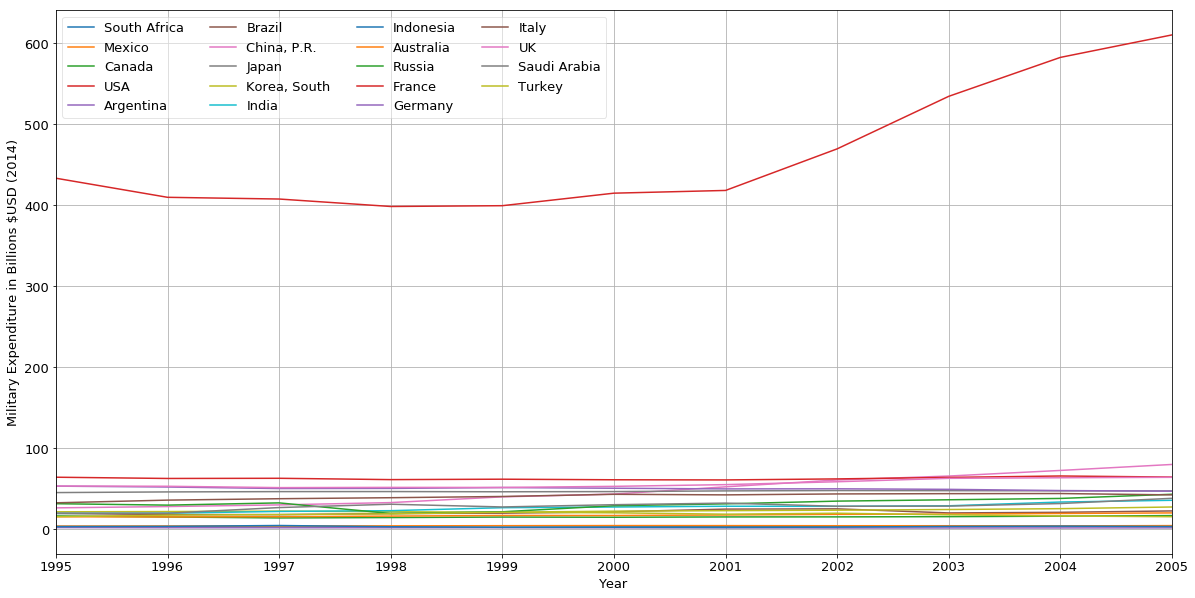

"Immediately we can see the United States' military expenditure in 1995 was over 4 times more than \nthe next closest country. Starting in 2001, this discrepancy in military spending has only \nbecome more exaggerated with more than 6 times difference in MilEx by 2005."

In [10]:
'''
Let's now plot the military expenditures of our G20 nations for 1995 - 2005. 
First we'll transpose the dataframe. Then so that we have unique colors for each country
we'll make a color generator using the cubehelix colormap
'''
milG20Trans = militaryDataG20.transpose()


# We'll create a color generator use the 'cubehelix' as the color map. 
NUM_COLORS = 19
cm = plt.get_cmap('cubehelix')

#Initiate the plot
fullG20 =  milG20Trans.plot(figsize=(20, 10), fontsize=13)


fullG20.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    fullG20.plot(np.arange(20)*(i+1))

#set plot specifics 
plt.legend(loc='best', fontsize=13, ncol = 4, fancybox=True, framealpha=0.5)
fullG20.set_xlabel('Year', fontsize=13)
fullG20.set_ylabel('Military Expenditure in Billions $USD (2014)', fontsize=13)
fullG20.set_xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004 ,2005])
fullG20.grid(True)

#Save the plot to the directory
plt.savefig("Full G20.png", dpi=300, transparent=True)

plt.show()

'''Immediately we can see the United States' military expenditure in 1995 was over 4 times more than 
the next closest country. Starting in 2001, this discrepancy in military spending has only 
become more exaggerated with more than 6 times difference in MilEx by 2005.'''

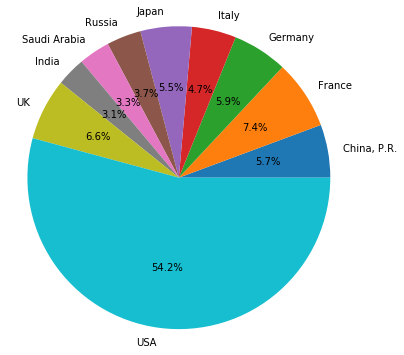

In [15]:
#Let's make a pie chart to show share of the cumulative military expenditure between 1995-2005 for each of the 
#top ten G20 nations.

top10WUS = ["China, P.R.", "France", "Germany", "Italy", "Japan", "Russia", "Saudi Arabia", "India","UK"
, "USA"]

#Create a G20 top dataframe
g20Top = militaryDataG20.loc[top10WUS].transpose()

#We'll take advantage of the fact that the ratio of the average MilEx for this period is equivalent
# to the ratio of the cumulative MilEx by each country 
milG20Trans_describeMean = g20Top.describe().transpose().drop(['count', 'std', 'min', '25%'
                                                             , '50%', '75%', 'max'], axis = 1)
#Set plot specifics
plt.pie(milG20Trans_describeMean['mean'], labels = milG20Trans_describeMean.index, 
        autopct= '%0.1f%%')
plt.axis('equal')
plt.set_cmap("cubehelix")
fig = plt.gcf()
fig.set_size_inches(6,6) # or (4,4) or (5,5) or whatever

#Save plot
plt.savefig("Total Annual Spend.png", dpi=300, transparent=True)

plt.show()

/Users/davidrobison/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


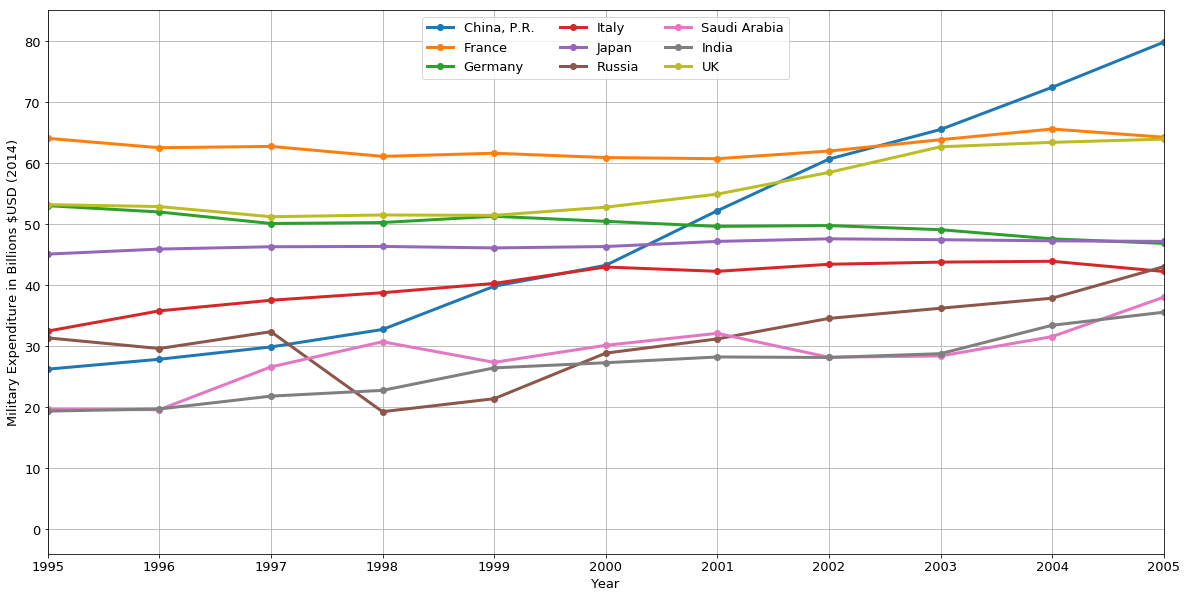

"\nThis immediately shows us some interesting data. First in 1995, outside of the U.S., France had the highest MilEx, \nat over $60B, and approximately 10 billion more than European counterparts Germany and the United Kingdom. However after\n2001 where we saw a huge spike for the U.S. we see a similar spike for the UK, but not for France or Germany. \nAdditionally, by 2005 China's military expenditure had significantly increased from amongst the lowest\n~25B to the highest of all non-US nations ~$80B."

In [16]:
'''While the previous findings are significant, let's exclude the United States so we can get a closer look at spending
for the other nine G20 nations who were among the 10 highest in MilEx between 1995 - 2005.'''

top10WOUS = ["China, P.R.", "France", "Germany", "Italy", "Japan", "Russia", "Saudi Arabia", "India","UK"]

g20TopWOUS = militaryDataG20.loc[top10WOUS].transpose()

#Set color generator and plot
NUM_COLORS = 9

cm = plt.get_cmap('cubehelix')

topG20WOUS =  g20TopWOUS.plot(figsize=(20, 10), fontsize=13, marker='o', linewidth = 3)

topG20WOUS.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    topG20WOUS.plot(np.arange(10)*(i+1))

plt.legend(loc='upper center', fontsize=13, ncol = 3)
topG20WOUS.set_xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004 ,2005])
topG20WOUS.set_xlabel('Year', fontsize=13)
topG20WOUS.set_ylabel('Military Expenditure in Billions $USD (2014)', fontsize=13)
topG20WOUS.grid(True)

plt.savefig("G20MilexWOUS.png", dpi = 300, transparent = True)

plt.show()
'''
This immediately shows us some interesting data. First in 1995, outside of the U.S., France had the highest MilEx, 
at over $60B, and approximately 10 billion more than European counterparts Germany and the United Kingdom. However after
2001 where we saw a huge spike for the U.S. we see a similar spike for the UK, but not for France or Germany. 
Additionally, by 2005 China's military expenditure had significantly increased from amongst the lowest
~25B to the highest of all non-US nations ~$80B.'''

In [17]:
'''
Let's now read into Real GDP data from the World Bank and do the same cleaning to get a dataframe of Real GDP
data for G20 nations. We are using Real GDP because it is inflation adjusted.
'''

gdpData = pd.read_excel("API_NY.GDP.MKTP.KD_DS2_en_excel_v2.xls", 
                             sheetname= "Data",
                             header = 3,
                            parse_cols = [0,39,40,41,42,43,44,45,46,47,48, 49],
                            skip_footer = 1)

gdpDataG20 = gdpData.loc[gdpData["Country Name"].isin(["Argentina", "Australia", "Brazil", 
                                                        "Canada", "China", "France",
                                                       "Germany", "India", "Indonesia",
                                                       "Italy", "Japan", "Mexico", "Korea, Rep.", "Russian Federation",
                                                       "Saudi Arabia", "South Africa",
                                                       "Turkey", "United Kingdom", "United States"])]

gdpDataG20 = gdpDataG20.set_index("Country Name")
gdpDataG20 = gdpDataG20.convert_objects(convert_numeric=True)
gdpDataG20 = gdpDataG20.divide(1000000000,1) #transform GDP values into billions for interpretability 

#Let's average Real GDP over the 10 year period and see how it compares to military expenditure 
gdpRanked_avg = gdpDataG20.mean(axis = 1).sort_values(axis = 0, ascending = False)
gdpRanked_avg

/Users/davidrobison/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Country Name
United States         12403.467063
Japan                  5344.625950
Germany                3060.935961
China                  2349.868185
France                 2299.984106
United Kingdom         2069.552514
Italy                  2026.020289
Brazil                 1547.651720
Canada                 1312.142955
Russian Federation      988.206797
Mexico                  840.867009
Australia               837.856964
India                   825.358480
Korea, Rep.             712.221784
Turkey                  498.066756
Indonesia               482.217571
Saudi Arabia            326.007006
Argentina               296.071448
South Africa            270.723709
dtype: float64

/Users/davidrobison/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


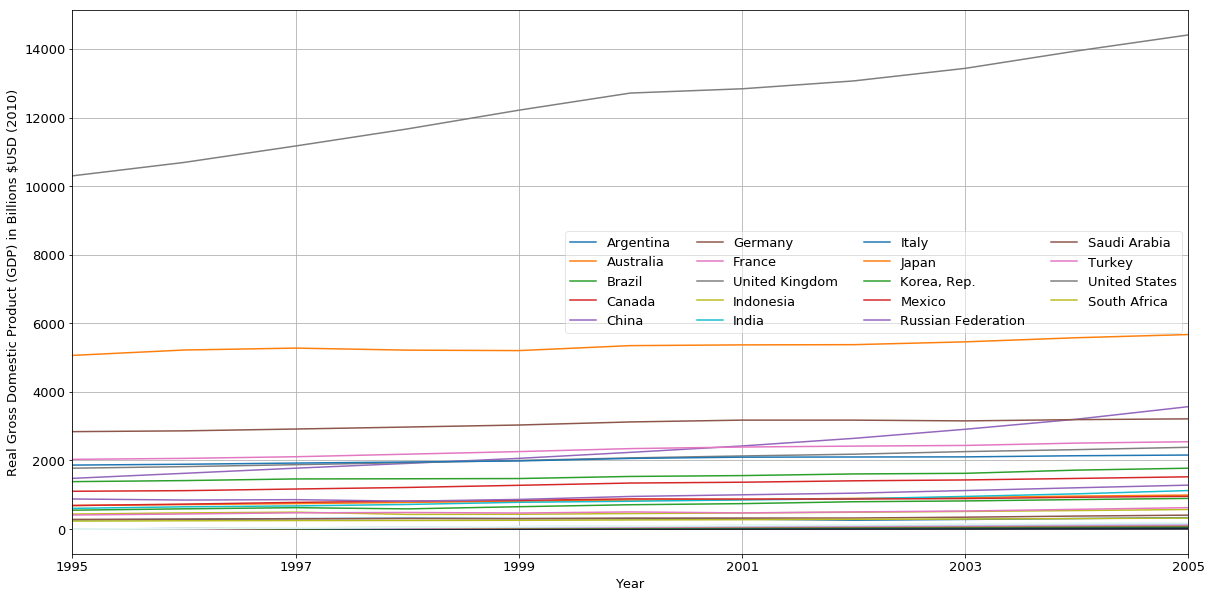

In [18]:
#Let's plot the Real GDP data

NUM_COLORS = 19

gdpDataG20 = gdpDataG20.transpose()

cm = plt.get_cmap('cubehelix')

gdpG20 =  gdpDataG20.plot(figsize=(20, 10), fontsize=13)

gdpG20.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    gdpG20.plot(np.arange(20)*(i+1))

plt.legend(loc='best', fontsize=13, ncol = 4, fancybox=True, framealpha=0.5)
gdpG20.set_xlabel('Year', fontsize=13)
gdpG20.set_ylabel('Real Gross Domestic Product (GDP) in Billions $USD (2010)', fontsize=13)
gdpG20.grid(True)

plt.savefig("GDP G20.png", dpi=300, transparent=True)

plt.show()

In [19]:
'''
Now let's combine some World Bank Census Data with SIPRI data to look at Per Capita Military Expenditure for each 
Year. This metric helps give us another sense of the extent that a country is emphasizing defense, 
especially when compared to other per capita expenditure metrics.

Rather than use SIPRI data, we want to combine WB census data with SIPRI inflation adjusted MilEx data so we can get an 
accurate assessment.

So first, read in the World Bank census data to make a dataframe. 
'''

popData = pd.read_excel("API_SP.POP.TOTL_DS2_en_excel_v2.xls", 
                             sheetname= "Data",
                             header = 3,
                            parse_cols = [0,39,40,41,42,43,44,45,46,47,48, 49],
                            skip_footer = 1)

popDataG20 = popData.loc[popData["Country Name"].isin(["Argentina", "Australia", "Brazil", 
                                                        "Canada", "China", "France",
                                                       "Germany", "India", "Indonesia",
                                                       "Italy", "Japan", "Mexico", "Korea, Rep.", "Russian Federation",
                                                       "Saudi Arabia", "South Africa",
                                                       "Turkey", "United Kingdom", "United States"])]

popDataG20 = popDataG20.set_index("Country Name").sort_index()
popDataG20 = popDataG20.convert_objects(convert_numeric=True)

popDataG20.head()


/Users/davidrobison/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Country Name,,,,,,,,,,,
Argentina,3.499482e+07,3.541968e+07,3.583396e+07,3.624158e+07,3.664805e+07,3.705745e+07,3.747154e+07,3.788944e+07,3.830948e+07,3.872878e+07,3.914549e+07
Australia,1.807200e+07,1.831100e+07,1.851700e+07,1.871100e+07,1.892600e+07,1.915300e+07,1.941300e+07,1.965140e+07,1.989540e+07,2.012740e+07,2.039480e+07
Brazil,1.627551e+08,1.653032e+08,1.678938e+08,1.705165e+08,1.731531e+08,1.757864e+08,1.784194e+08,1.810456e+08,1.836273e+08,1.861164e+08,1.884792e+08
Canada,2.935400e+07,2.967190e+07,2.998720e+07,3.024790e+07,3.049920e+07,3.076970e+07,3.108190e+07,3.136200e+07,3.167600e+07,3.199500e+07,3.231200e+07
China,1.204855e+09,1.217550e+09,1.230075e+09,1.241935e+09,1.252735e+09,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09
France,5.954190e+07,5.975310e+07,5.996484e+07,6.018629e+07,6.049672e+07,6.091250e+07,6.135743e+07,6.180527e+07,6.224488e+07,6.270490e+07,6.317936e+07
Germany,8.167805e+07,8.191483e+07,8.203477e+07,8.204720e+07,8.210024e+07,8.221151e+07,8.234992e+07,8.248850e+07,8.253418e+07,8.251626e+07,8.246942e+07
India,9.608750e+08,9.792904e+08,9.978172e+08,1.016403e+09,1.034977e+09,1.053481e+09,1.071888e+09,1.090189e+09,1.108370e+09,1.126419e+09,1.144326e+09
Indonesia,1.969578e+08,1.999266e+08,2.028538e+08,2.057535e+08,2.086441e+08,2.115404e+08,2.144483e+08,2.173691e+08,2.203078e+08,2.232686e+08,2.262547e+08


In [21]:
#Let's sort the index of our militaryG20 dataframe so we can do an element wise division against the popG20Data 
#dataframe

militaryDataG20_sort = militaryDataG20.sort_index()

#Do an element wise division against the popDataG20 dataframe using integer index locator for key indexing that is
#needed by Pandas to conduct the element wise division
militaryDataPerCapitaG20 = militaryDataG20_sort.ix[0:20].divide(popDataG20.ix[0:20].values)
militaryDataPerCapitaG20 = militaryDataPerCapitaG20.multiply(1000000000) #readjust values to dollars per person
militaryDataPerCapitaG20.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Country,,,,,,,,,,,
Argentina,54.019481,47.358101,46.027498,45.878401,46.756244,44.046070,42.909680,36.162556,36.839307,37.498419,38.970442
Australia,841.738287,820.600783,825.815820,857.318189,889.198356,876.112957,898.825875,925.906561,931.236118,958.450378,979.137543
Brazil,118.793242,108.769066,106.356864,112.561146,113.553719,121.159079,138.268761,138.081954,108.605897,111.335604,118.956181
Canada,554.538228,503.778463,459.361131,471.149025,487.436401,475.237951,482.936285,481.052913,485.051509,498.394000,515.209337
"China, P.R.",21.756466,22.863152,24.273002,26.342220,31.770703,34.237485,41.026234,47.361852,50.835330,55.872543,61.216169
France,1075.659104,1046.134617,1046.025181,1015.035269,1018.359760,999.742650,989.470324,1002.554728,1025.394463,1045.732783,1016.707885
Germany,649.028797,634.522796,610.564267,612.431958,624.502772,613.634194,602.533903,603.155588,594.582606,576.493461,567.846515
India,20.123545,20.103144,21.840225,22.369982,25.530683,25.881738,26.323174,25.801184,25.944662,29.654284,31.064805
Indonesia,15.300154,16.866032,21.846379,14.089007,10.556260,10.709288,9.391897,11.202122,14.885928,16.394117,14.051193


/Users/davidrobison/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


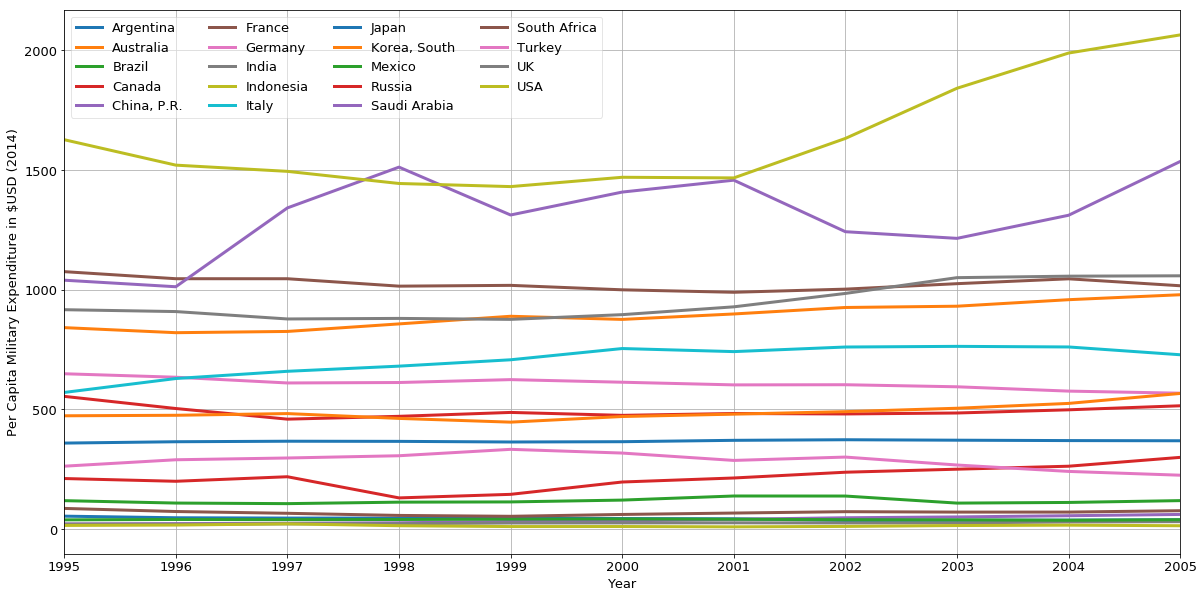

In [22]:
'''
Let's now plot the per capita military expenditures of our G20 nations for 1995 - 2005. 
First we'll transpose the dataframe. Then so that we have unique colors for each country
we'll use the color generator from the cube helix color map 
'''
militaryDataPerCapitaG20Trans = militaryDataPerCapitaG20.transpose()


# We'll create a color generator use the 'cubehelix' as the color map. 
NUM_COLORS = 19
cm = plt.get_cmap('cubehelix')

#Initiate the plot
perCapitaG20 =  militaryDataPerCapitaG20Trans.plot(figsize=(20, 10), fontsize=13, linewidth = 3)


perCapitaG20.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    perCapitaG20.plot(np.arange(20)*(i+1))

#set plot specifics 
plt.legend(loc='best', fontsize=13, ncol = 4, fancybox=True, framealpha=0.5)
perCapitaG20.set_xlabel('Year', fontsize=13)
perCapitaG20.set_ylabel('Per Capita Military Expenditure in $USD (2014)', fontsize=13)
perCapitaG20.set_xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004 ,2005])
perCapitaG20.grid(True)

plt.savefig("Per Capita G20.png", dpi=300, transparent=True)

plt.show()

In [23]:
#Create a dataframe of the average per Capita military expenditure for the time period. 
#I could probably have also used the GroupBy method

militaryDataPerCapitaG20Trans_describeMean = militaryDataPerCapitaG20Trans.describe().transpose().drop(['count', 'std', 'min', '25%'
                                                             , '50%', '75%', 'max'], axis = 1)

militaryDataPerCapitaG20Trans_describeMean = militaryDataPerCapitaG20Trans_describeMean.sort_values(by = "mean", 
                                                                                                    ascending = False,
                                                                                                    axis=0)
militaryDataPerCapitaG20Trans_describeMean

,mean
Country,
USA,1634.779440
Saudi Arabia,1308.147666
France,1025.528797
UK,948.616354
Australia,891.303715
Italy,705.186767
Germany,608.117896
Canada,492.195022
"Korea, South",488.995734


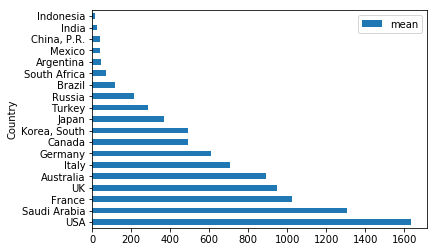

In [24]:
militaryDataPerCapitaG20Trans_describeMean.plot(kind = "barh")

In [25]:
'''
Let's finally read in World Bank data on per capita Real GDP so we can compare this to per capita
military expenditure. 
'''

perCapitaGDP = pd.read_excel('API_NY.GDP.PCAP.KD_DS2_en_excel_v2.xls', sheetname= "Data",
                             header = 3,
                            parse_cols = [0,39,40,41,42,43,44,45,46,47,48, 49],
                            skip_footer = 1)

perCapitaGDPG20 = perCapitaGDP.loc[perCapitaGDP["Country Name"].isin(["Argentina", "Australia", "Brazil", 
                                                        "Canada", "China", "France",
                                                       "Germany", "India", "Indonesia",
                                                       "Italy", "Japan", "Mexico", "Korea, Rep.", "Russian Federation",
                                                       "Saudi Arabia", "South Africa",
                                                       "Turkey", "United Kingdom", "United States"])]

perCapitaGDPG20 = perCapitaGDPG20.set_index("Country Name").sort_index()
perCapitaGDPG20 = perCapitaGDPG20.convert_objects(convert_numeric=True)

perCapitaGDPG20

/Users/davidrobison/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Country Name,,,,,,,,,,,
Argentina,7650.438210,7976.414171,8523.688572,8752.307922,8362.213906,8204.581940,7756.187018,6834.962261,7357.408446,7934.902330,8548.282637
Australia,38038.468733,39024.566253,40113.717214,41459.694257,43041.054969,44176.311733,44425.571112,45579.194082,46402.684260,47771.047770,48656.475016
Brazil,8501.340122,8555.071610,8709.028271,8604.092437,8512.823184,8730.147298,8743.909691,8880.166124,8855.152078,9240.040324,9416.363871
Canada,37568.111004,37764.368124,38966.545344,40130.252035,41854.533499,43636.706676,43963.366314,44882.206921,45238.177055,46169.252224,47179.857911
China,1227.556380,1335.362651,1443.774711,1542.064097,1645.987960,1771.741467,1905.610739,2065.718534,2258.912056,2472.586502,2738.205401
France,34147.737846,34499.338998,35181.032579,36298.094563,37342.206014,38524.505120,38992.626944,39143.045165,39185.113554,39981.498759,40319.209994
Germany,34784.639547,34967.772711,35562.326507,36260.833239,36957.489890,38000.687703,38580.022511,38515.213064,38220.625130,38676.190720,38971.641895
India,628.862635,663.620282,677.675042,706.427151,755.116983,770.347837,793.642117,810.002278,859.341002,912.564969,981.688932
Indonesia,2223.428299,2357.820452,2433.011949,2083.850119,2071.237712,2143.389901,2191.360751,2259.190315,2335.611643,2420.582233,2524.610304


/Users/davidrobison/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


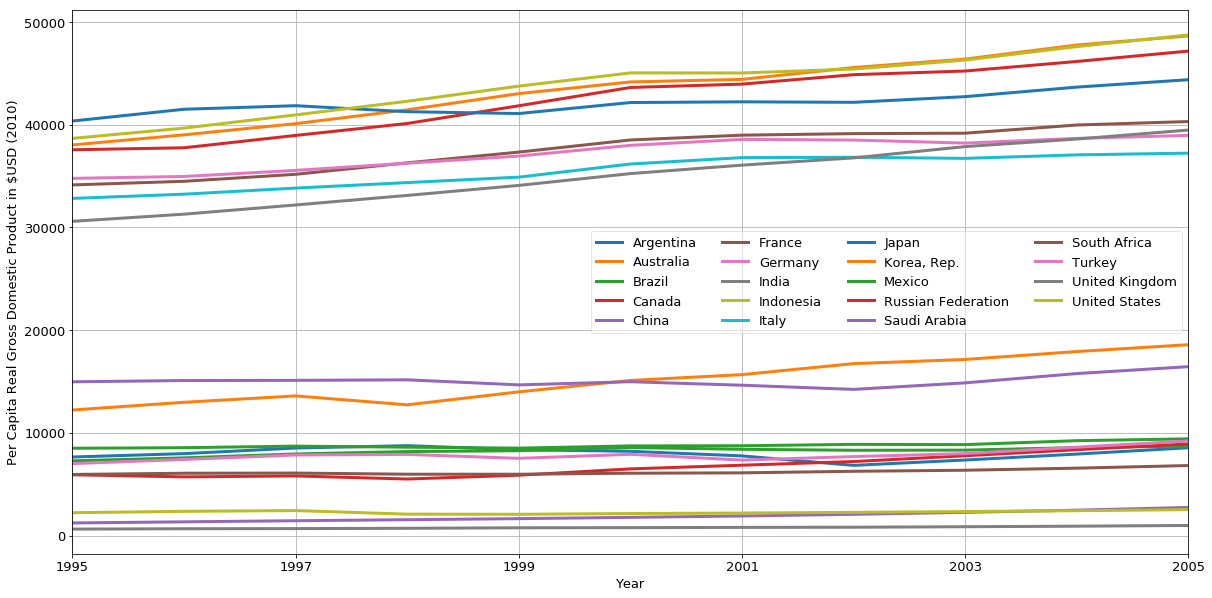

In [26]:
'''
Let's now plot the per capita Real GDP of our G20 nations for 1995 - 2005. 
First we'll transpose the dataframe. Then so that we have unique colors for each country
we'll use the color generator from the cube helix color map 
'''
perCapitaGDPG20 = perCapitaGDPG20.transpose()


# We'll create a color generator use the 'cubehelix' as the color map. 
NUM_COLORS = 19
cm = plt.get_cmap('cubehelix')

#Initiate the plot
perCapGDPG20 =  perCapitaGDPG20.plot(figsize=(20, 10), fontsize=13, linewidth = 3)


perCapGDPG20.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    perCapitaG20.plot(np.arange(20)*(i+1))

#set plot specifics 
plt.legend(loc='best', fontsize=13, ncol = 4, fancybox=True, framealpha=0.5)
perCapGDPG20.set_xlabel('Year', fontsize=13)
perCapGDPG20.set_ylabel('Per Capita Real Gross Domestic Product in $USD (2010)', fontsize=13)
perCapGDPG20.grid(True)

plt.savefig("Per Capita GDP.png", dpi=300, transparent=True)

plt.show()

In [27]:
#Create a dataframe of the per Capita GDP means. I could probably have also used the GroupBy method
perCapitaGDPG20_describeMean = perCapitaGDPG20.describe().transpose().drop(['count', 'std', 'min', '25%'
                                                             , '50%', '75%', 'max'], axis = 1)

perCapitaGDPG20_describeMean = perCapitaGDPG20_describeMean.sort_values(by = "mean", 
                                                                                                    ascending = False,
                                                                                                    axis=0)
perCapitaGDPG20_describeMean

,mean
Country Name,
United States,43962.976417
Australia,43517.162309
Canada,42486.670646
Japan,42139.028355
France,37601.309958
Germany,37227.040265
Italy,35460.404893
United Kingdom,35036.682587
"Korea, Rep.",15154.581533


In [51]:
#To calculate the fastest growing nations in military expenditure, create a new dataframe and append two columns 
# calculating the fixed change for the time period and the relative change as a percentage

milDataG20Delta = militaryDataG20

#Calculate fixed difference and relative difference in military spending over the time period
milDataG20Delta['Fixed Change in Spending ($USD Billion)'] = milDataG20Delta[2005] - milDataG20Delta[1995]
milDataG20Delta["Relative % Change in Spending"] = ((milDataG20Delta[2005] - milDataG20Delta[1995])/ 
                                                 milDataG20Delta[2005]) *100

#Drop columns
milDataG20Delta = milDataG20Delta.drop([1995, 1996, 1997, 1998, 1999, 2000, 
                                        2001, 2002, 2003, 2004 ,2005], axis= 1).sort_index()

#Save the dataframe as an excel file
milDataG20Delta.to_excel("Change in Spending.xlsx")

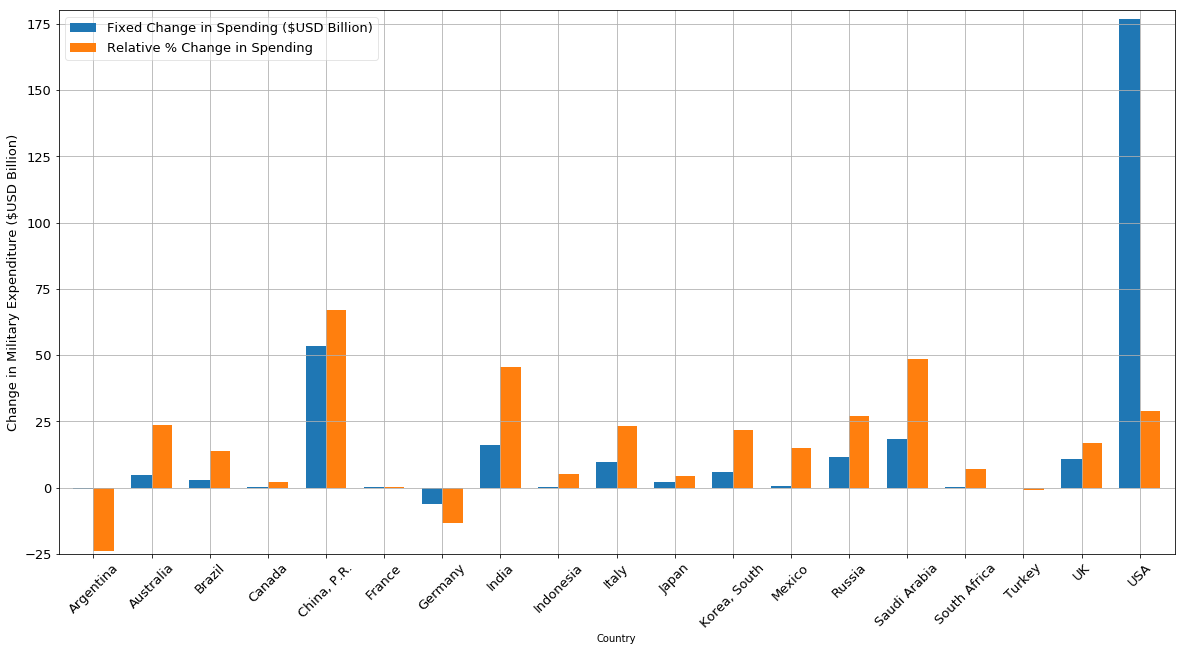

In [53]:
#Create a bar plot with a shared Y-axis to visualize the changes in military expenditure between 2005 and 1995. 

milExDelta =  milDataG20Delta.plot(figsize=(20, 10), fontsize=13, kind= 'bar', width = .7)
milExDelta.twiny
milExDelta.set_ylim(-25, 180)
milExDelta.set_ylabel("Change in Military Expenditure ($USD Billion)", fontsize = 13)
milExDelta.grid(True)
plt.legend(loc='best', fontsize=13,fancybox=True, framealpha=0.5)

#Rotate x-ticks 45 degrees 
milExDelta.set_xticklabels(milExDelta.xaxis.get_majorticklabels(), rotation=45)

#Save the figure
plt.savefig("Change in MilEx.png", dpi=300, transparent=True)

In [ ]:
'''
I also looked at G20 countries who were in the bottom 9 in total MilEx between 1995 - 2005. 
'''

bottom9 = ["Argentina", "Australia", "Brazil", "Canada", "Korea, South", "Indonesia","Mexico", "South Africa", "Turkey"]
g20Bottom = militaryDataG20.loc[bottom9].transpose()

botG20 =  g20Bottom.plot(figsize=(20, 10), fontsize=13, marker='o')

botG20.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i in range(NUM_COLORS):
    botG20.plot(np.arange(10)*(i+1))
    
plt.legend(loc='upper center', fontsize=13, ncol = 3)
botG20.set_xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004 ,2005])
botG20.set_xlabel('Year', fontsize=13)
botG20.set_ylabel('Military Expenditure in Millions', fontsize=13)
botG20.grid(True)
plt.show()

'''
Here we do not see significant changes in the Military Expenditure of these nations over this period. 
'''